<a href="https://colab.research.google.com/github/ch-manasa/AI-and-ML/blob/main/Food_Hub_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here

Problem Statement Context:
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

Objective:
To analyze the data to get a fair idea about the demand of different restaurant which help with the customer service of the food aggregator.



### **Data Dictionary**

order_id: Unique ID of the order

customer_id: ID of the customer who ordered the food

restaurant_name: Name of the restaurant

cuisine_type: Cuisine ordered by the customer

cost_of_the_order: Cost of the order

day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

rating: Rating given by the customer out of 5

food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Libraries: reading,manipulating data & Vizualization of data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
foodhub_order = pd.read_csv("/content/drive/MyDrive/AI&ML/Python Intro/foodhub_order.csv")

## **Overview of the dataset**

**Displaying the first 5 rows of the dataset**

In [ ]:
foodhub_order.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24




*   The dataset contains information related to the customers ordering food.
*   It also has information about the day customers places orders,rate the cusine.
* It also contains information regarding how long the food takes to prepare and to deliver to customers.



**Understanding the shape of the dataset**

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
foodhub_order.shape

(1898, 9)

#### Observations:
foodhub order dataset has 1898 rows, 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

**Checking the data types of the columns for the dataset**

In [ ]:
# Write your code here
foodhub_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset contains 1898 records from multiple restaurants across different cuisines, with no missing values and mostly numeric columns.

*   The Columns *oder_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time* are all numerical columns while the rest of the columns are categorical in nature.
*   *order_id* is a unique identifier column and will be dropping it as it will not provide any insights.



In [ ]:
foodhub = foodhub_order.drop('order_id', axis=1)

In [ ]:
foodhub.head()

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Successfully dropped *order_id* column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
foodhub.isnull().sum()

,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


*   None of the columns have missing values, this dataset if clean.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
foodhub.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1898.0,171168.478398,113698.139743,1311.00,77787.75,128600.00,270525.0000,405334.00
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:


*   Cost of the order varies from around 4.5 dollars to 35.5 dollars. Half of the order's costs are less than 15 dollars. Safe to say that most of the orders are not very costly.
*   Least amount of time to prepare food required by the restaurants is 20 minutes, the maximum amount of time rrequired by the restaurants is 35 minutes
* Least amount of time it takes the deliery person to deliver the food package to customer is 15 minutes. Maximum amount of time it takes delivery person to deliver food package is 33 minutes.
* Customer Id is spread over a huge range, ranging from 1311 to 405334.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
foodhub[foodhub['rating'] == 'Not given'].shape

(736, 8)

#### Observations:


*   We notice that even though dataset did not have missing null values (Nan) above, the *rating* column has 736 orders where customer did not provide rating.
*   Need to handle this differently for each of the analysis below.


1.   For Univariate Analysis: I will keep Not given as a separate category, to find the number of orders we have rating for and not.
2.   For Bivariate & Multivariate Analysis: I will keep Not given as a separate category, to find relationship between frequency of Not given rating  with delivery time for orders.
3. For Numerical calculations: I can exclude the orders with Not given rating.





# **Exploratory Data Analysis (EDA)**

## **Univariate Analysis**

### Univariate Analysis for numerical columns

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Undesrtanding the distribution of cost of the order**

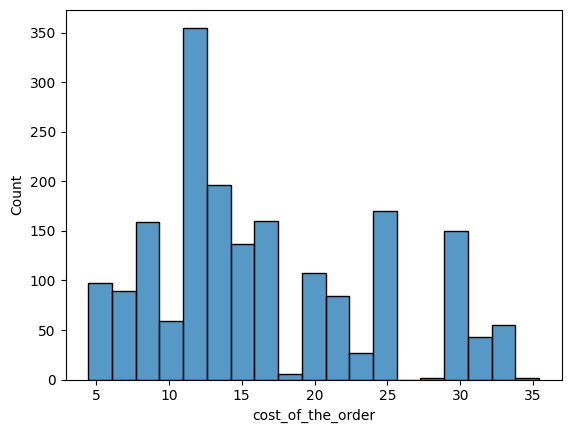

In [ ]:
# Write the code here
sns.histplot(data=foodhub, x='cost_of_the_order');
plt.show()

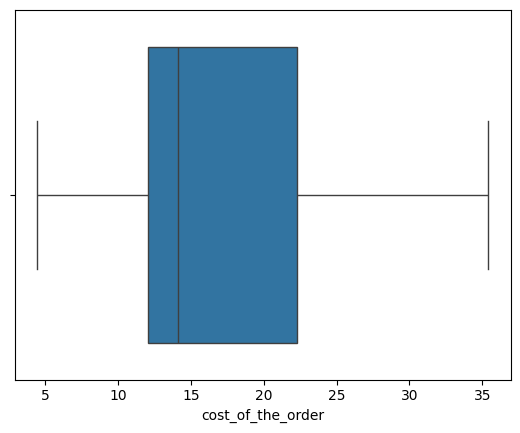

In [ ]:
sns.boxplot(data=foodhub, x='cost_of_the_order');
plt.show()

### Observations


*  We can see that there are no outliers detected in the cost of the orders column
meaning there is no sudden high or low costs of food items that fal outside the tyical range in this foodhub dataset.
* We see that the cost of the order column is slightly right skewed. So safe to say that less than 50% of the orders cost lower than the average cost of the orders (15 dollars), indicating that there are some orders with high cost.
* 50% of the costs lie between 12 to 23 dollars.




**Understanding the distribution of food preparation time**

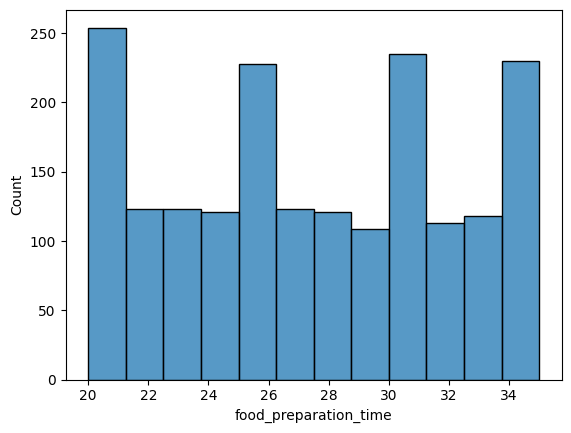

In [ ]:
sns.histplot(data=foodhub, x='food_preparation_time');
plt.show()

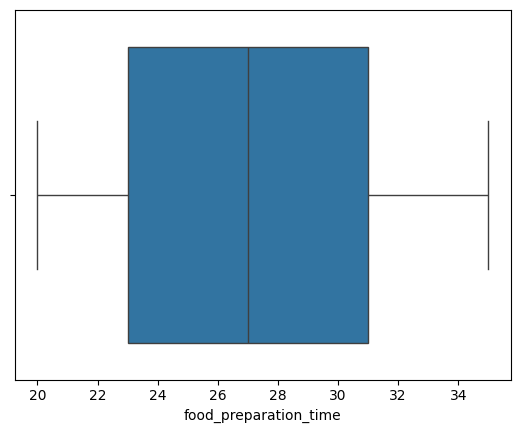

In [ ]:
sns.boxplot(data=foodhub, x='food_preparation_time');
plt.show()

### Observations


*   The food preparation time column is very close to symmetrical, evenly distributed.
*   The boxplot shows the median is in the center of the box. Whiskers also appear equal length.
* both these indicate there is no abnormal values in the food preparation time.



**Understanding the distribution of delivery time**

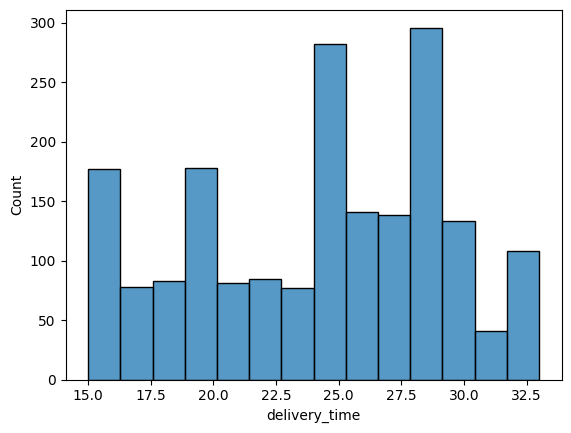

In [ ]:
sns.histplot(data=foodhub, x='delivery_time');
plt.show()

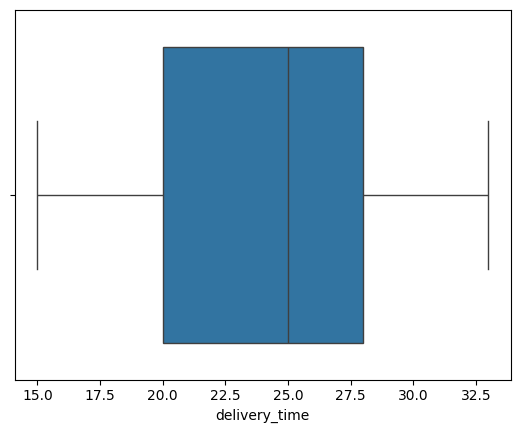

In [ ]:
sns.boxplot(data=foodhub, x='delivery_time');
plt.show()

### Observations



* The delivery time is left skewed, it is safe to say that delivery time for more than 50% of the orders is greater than the average delivery time.
* But we can see that there are no outliers indicating no abnormal delivery times like delivering too early or very late.
* 50% of the delivery time ranges from 20 - 28 minutes.



### Univariate Analysis for categorical columns

**Understand the distribution of day of the week column**

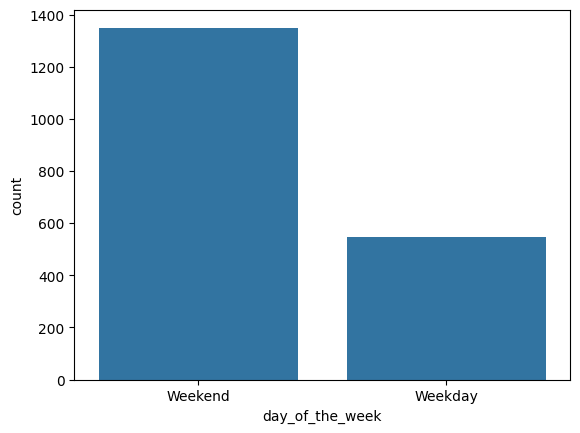

In [ ]:
sns.countplot(data=foodhub, x='day_of_the_week');
plt.show()

### Observations


*   The number of oders is more on weekends than on weekdays
*   The number of orders on weekends is more than twice the oders on weekday.



**Understand the distribution of cuisine type**

/tmp/ipython-input-1901836759.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cuisine.set_xticklabels(cuisine_xtick, rotation=90, ha='right')


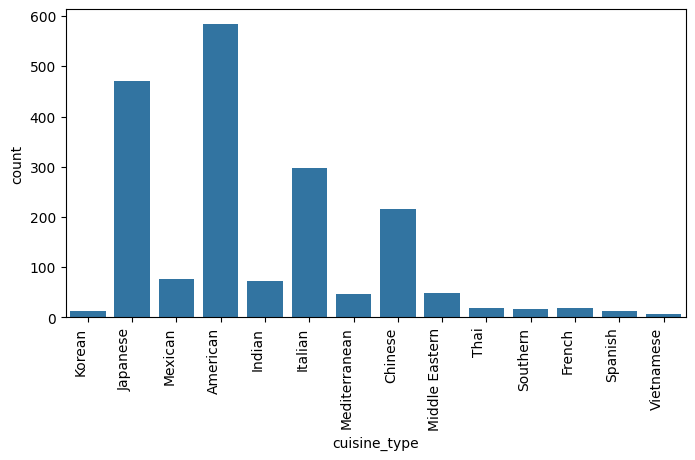

In [ ]:
plt.figure(figsize=(8,4))
cuisine = sns.countplot(data=foodhub, x='cuisine_type')

# Get the current tick locations and labels
ticks = cuisine.get_xticks()
labels = cuisine.get_xticklabels()

# Set the tick locations and labels explicitly to avoid the warning
cuisine.set_xticks(ticks)
cuisine.set_xticklabels(labels, rotation=90, ha='right')

plt.show()

### Observations


*   Most easily available cuisine type in restauarants in this dataset is American, follwed by Japanese, follwed by Italian.
*   Least available cuisine type is vietnamese, followed by Korean and Spanish.




**Understanding distribution of rating column**

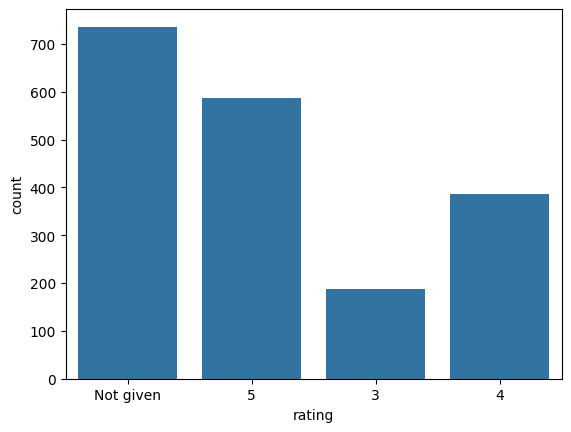

In [ ]:
sns.countplot(data=foodhub, x='rating');
plt.show()

### Observations


*   Most number of customers do not give rating.
*   Least rating provided by the customers is 3.
* The unique ratings give by customers is 3,4, or 5 or they do not provide ratings.



**Understanding the distribution of restaurant name**

In [ ]:
restaurant_top_five = foodhub['restaurant_name'].value_counts().head(5)
print(restaurant_top_five)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


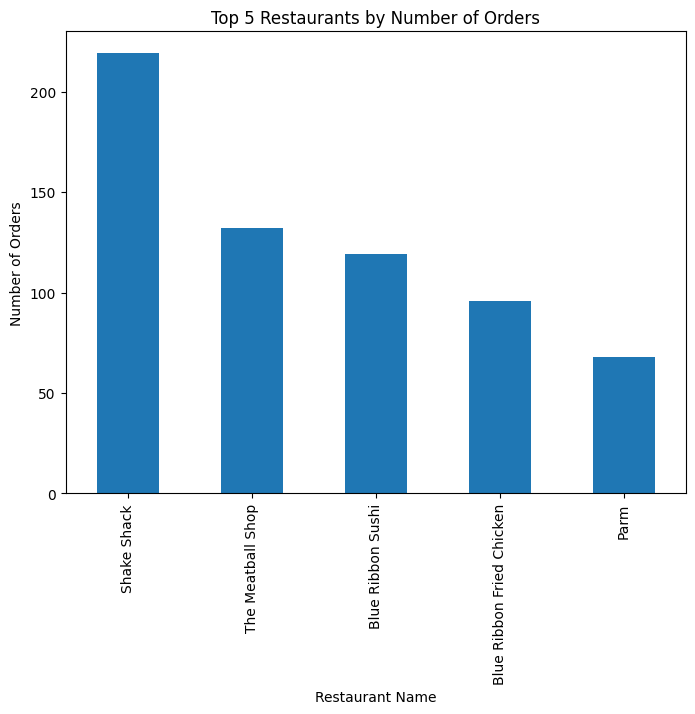

In [ ]:
plt.figure(figsize=(8, 6))
restaurant_top_five.plot(kind='bar')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

### Observations


*   There are multiple distinct restaurant names from which customers ordered. Hence I have cut to use top 5 Restaurant Names, then looking at this plot bar or from value counts we can confidently say that Shake shack was the most ordered, Parm is the fifth most ordered restaurant from.





In [ ]:
restaurant_top_5 = foodhub['restaurant_name'].value_counts().head(5).index.tolist()
foodhub_top_5_restaurants = foodhub[foodhub['restaurant_name'].isin(restaurant_top_5)]
foodhub_top_5_restaurants.head()

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
12,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code
print(restaurant_top_five.index.to_list())

['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']


#### Observations:
Highest ordered restaurant is Shake Shack
Top 5th ordered restaurant is Parm


## **Bivariate Analysis**

### Bivariate Analysis for **categorical - categorical** variables

### **Cuisine - Day of the week** analysis

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

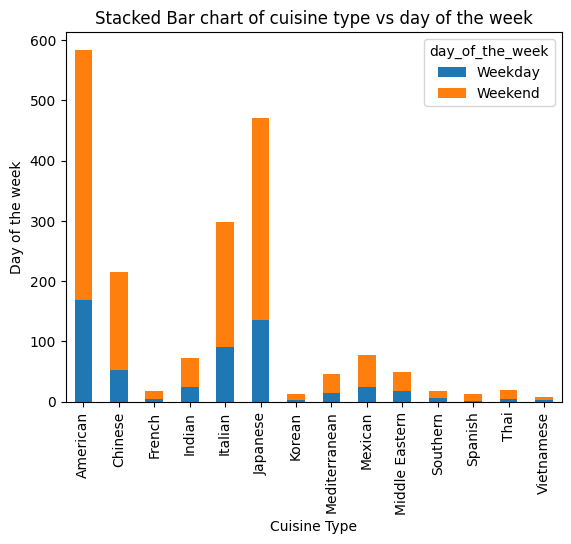

In [ ]:
# Write the code here
cuisine_by_day = pd.crosstab(foodhub['cuisine_type'], foodhub['day_of_the_week'])
cuisine_by_day.plot(kind='bar', stacked='true')
plt.title('Stacked Bar chart of cuisine type vs day of the week')
plt.xlabel('Cuisine Type')
plt.ylabel('Day of the week')
plt.show()

#### Observations:

From the above stacked Bar plot we can conclude that:
*   Most popular cuisine on weekend : **American**
*   Most popular cuisine on weekday : American
*   Least popular Cuisine on weekend : Vietnamese
*   Least popular cusiine on weekday : Spanish




### **Cuisine - Rating** analysis

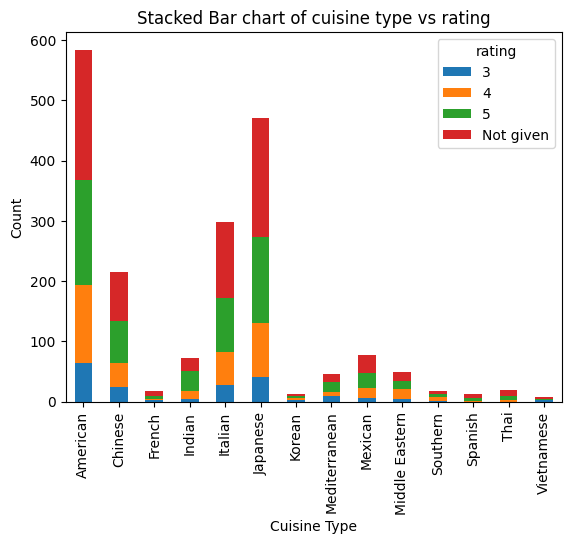

In [ ]:
cuisine_by_day = pd.crosstab(foodhub['cuisine_type'], foodhub['rating'])
cuisine_by_day.plot(kind='bar', stacked='true')
plt.title('Stacked Bar chart of cuisine type vs rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()

#### Observations:


*   We can see that the number of orders are drastically different for each cuisine, it would be incorrect to compare directly the relationship between cuisine type and rating.
* It is better to normalize to compare the relative distribuiton of these two categorical columns. IT will give a fair vizualiation for analysing the likelihood of a cusisine receiving a certain rating.
* Performing a stacked percentage Bar chart of cuisine type vs rating chart.





<Figure size 1200x800 with 0 Axes>

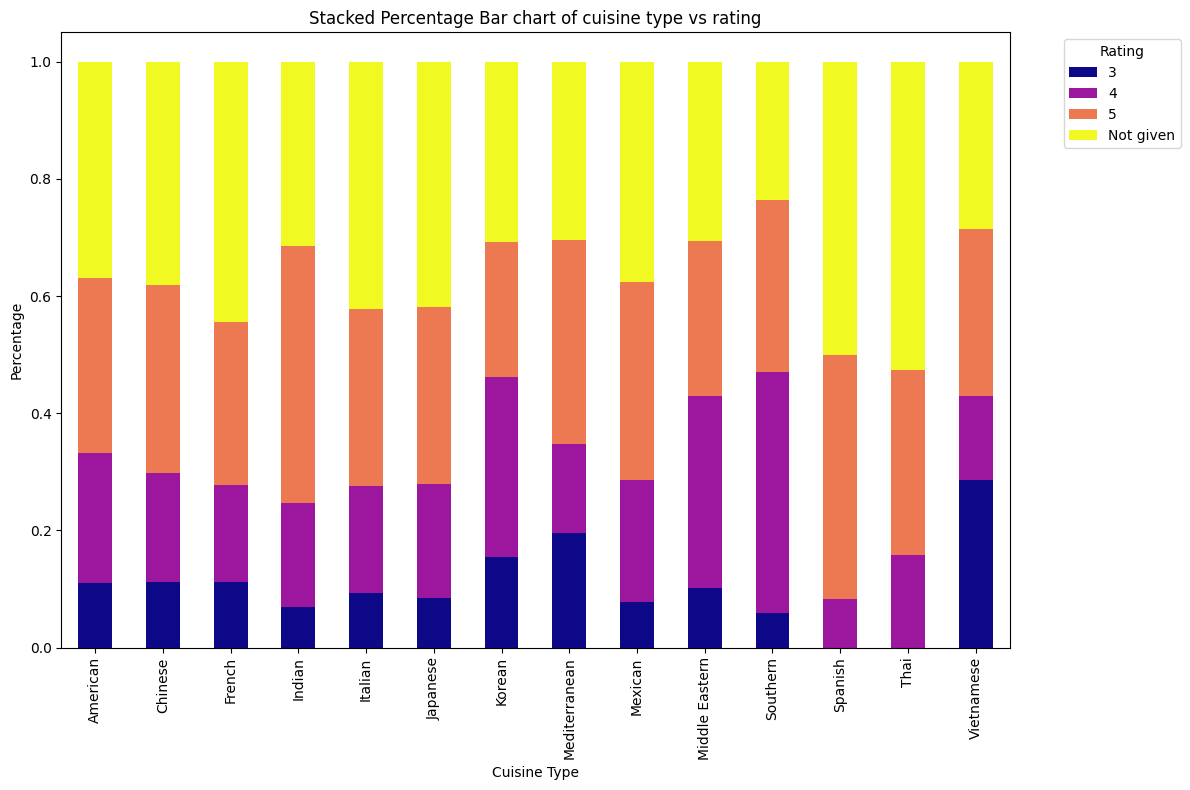

In [ ]:
cuisine_by_day = pd.crosstab(foodhub['cuisine_type'], foodhub['rating'])
cuisine_by_day_percentage = cuisine_by_day.divide(cuisine_by_day.sum(axis=1), axis=0)
plt.figure(figsize=(12, 8))
cuisine_by_day_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='plasma');
plt.title('Stacked Percentage Bar chart of cuisine type vs rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Observations:


*   We can now analyse easily that:
*   Highest 5-star rating percentage: Indian and Spanish.
*   Highest 4-star rating percentage: Southern cuisine followed by korean.
*   Highest 3-star rating percentage: Vietnamese followed by Mediterranean cuisine.





### **Top 5 restaurants - Day of the week** relationship

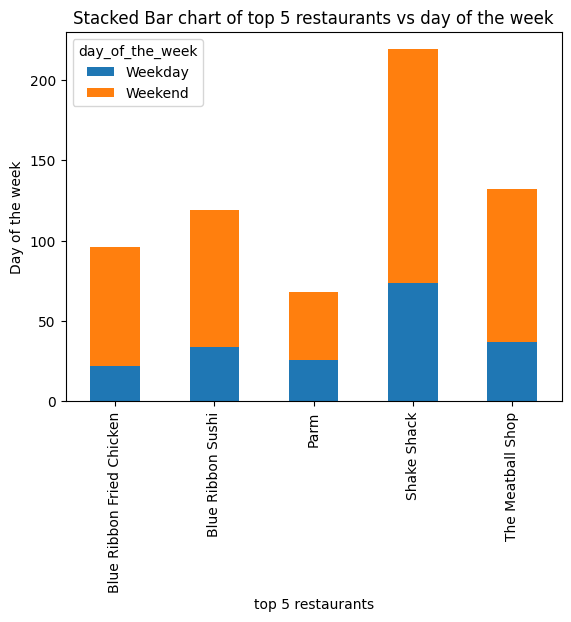

In [ ]:
# Write the code here
cuisine_by_day = pd.crosstab(foodhub_top_5_restaurants['restaurant_name'], foodhub['day_of_the_week'])
cuisine_by_day.plot(kind='bar', stacked='true')
plt.title('Stacked Bar chart of top 5 restaurants vs day of the week')
plt.xlabel('top 5 restaurants')
plt.ylabel('Day of the week')
plt.show()

### Observations:

We can analyse the frequency of food ordered from restaurants on which day of the week:
* Most ordered restaurant from on weekend : Shake Shack
* Most ordered restaurant from on weekday : Shake Shack
* Least ordered restaurant from on weekend : Parm
* Least ordered restaurant from on weekday : Blue Ribbon Fried Chicken

### Bivariate Analysis for **categorical - continuous** variables

#### **Top 10 customers - rating** relationship analysis

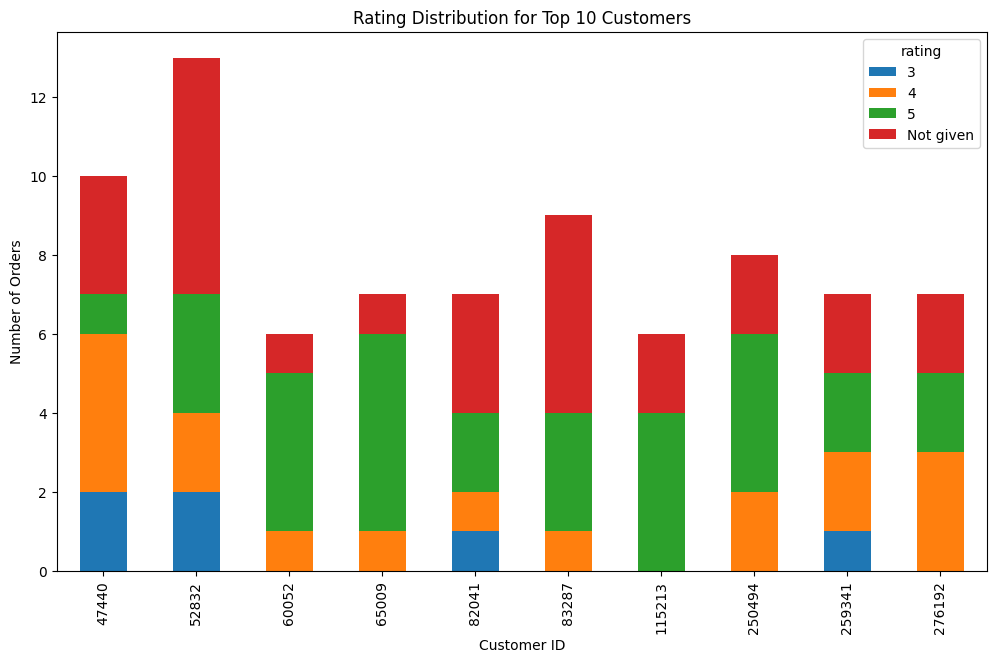

In [ ]:
top_10_customer_ids = foodhub['customer_id'].value_counts().head(10).index.tolist()
foodhub_top_10_customers = foodhub[foodhub['customer_id'].isin(top_10_customer_ids)]
customer_rating_crosstab = pd.crosstab(foodhub_top_10_customers['customer_id'], foodhub_top_10_customers['rating'])
customer_rating_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Rating Distribution for Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

### Observations:


*   while this does not provide a great insight, we can just visualize the the ratings given by top 10 customers.

*   I would generally say this might to be enough to analyse or provide a pattern on the kind of rating the customer prvoides.

* As it could depend on a lot of other factors like the
1.   cuisine type
2.   delivery time, food preparation time: in case delivery/ food prep was late and it took longer to deliver, same food ordered one day may get higher rating as it will be hot and good. But other day if the delivery takes longer and same food might get cold and soggy then customer could provide lower rating.
3. Even the temparature/ quality of the food on delivery.

* So in general this is not going to give us a full picture. To Explore how these factors relate to ratings, I will further need to do a multivariate analysis going further.





#### Distribution of **top 5 restauarant name - cost of the orders**

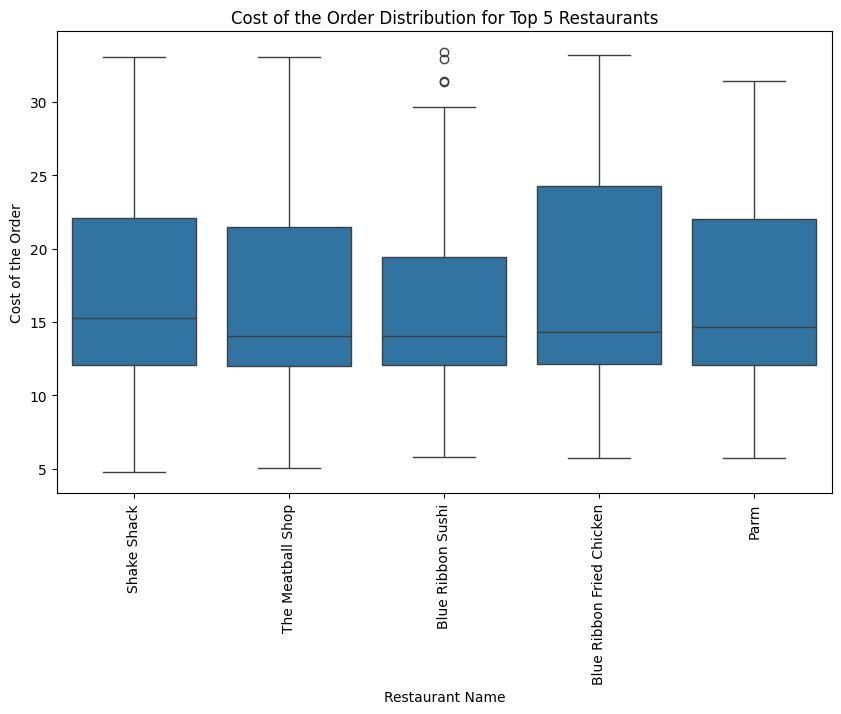

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=foodhub_top_5_restaurants, x='restaurant_name', y='cost_of_the_order', order=restaurant_top_5)

plt.title('Cost of the Order Distribution for Top 5 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Cost of the Order')
plt.xticks(rotation = 90)
plt.show()

### Observations:
Looking at the distribution of top 5 restaurants and the order costs we can see that:
*   median cost (Based on median): Sake Shack has the hightest median cost.
*   Variability (Based on the IQR): Blue Ribbon Fried Chicken shows most variability in order of costs. Blue Ribbon sushi has least variability.
*  Range ( Based on whiskers): Shake Shack and the meat ball shop seem to have wider range of costs.
* Outliers (Based on points beyond whiskers): Blue ribbon sushi shows several outliers, with significant higher costs compared to typical orders.

We can see that even though these are top 5 popular restaurants, the typical cost of order, spread of csots, high-cost orders differ among all 5 restaurants.  



#### Distribution of **cuisine type - cost of the orders**

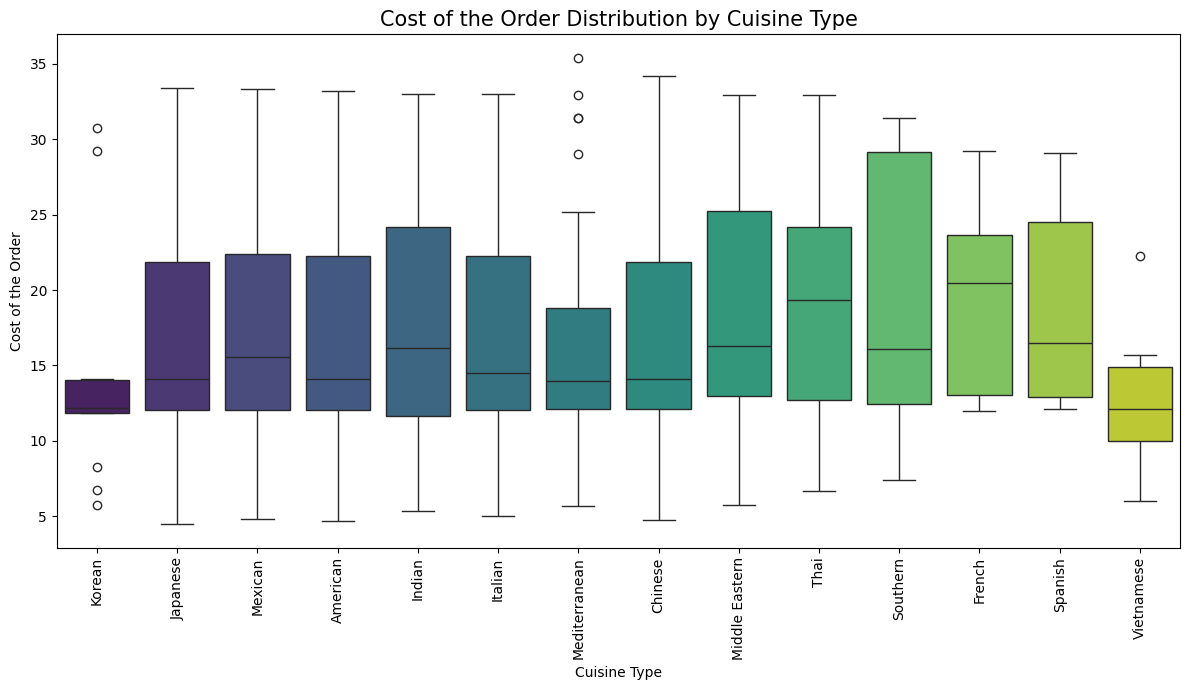

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=foodhub, x='cuisine_type', y='cost_of_the_order', palette='viridis',  hue='cuisine_type', legend=False)

plt.title('Cost of the Order Distribution by Cuisine Type', fontsize=15)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Observations
The relationship distribution between cuisine type and cost of the orders is as follows:

* The median costs vary significantly for all cuisine types. French and thai seem to have higher median costs than others like chinese or italian.
* The variability and spread in order of costs also differs well. Some cuisines seem to have a tight range of costs compared to others like korean, vietnamese.
* Some Cuisine types show outliers, indicating there are orders with unusal high or low costs for example Korean, Mediterranean, Vietnamese.

We can get a better understanding while analysing the top 5 restaurants - cuisine - order of the cost during the multi variate analysis.

#### Distribution of **top 5 restaurant name - food preparation time**

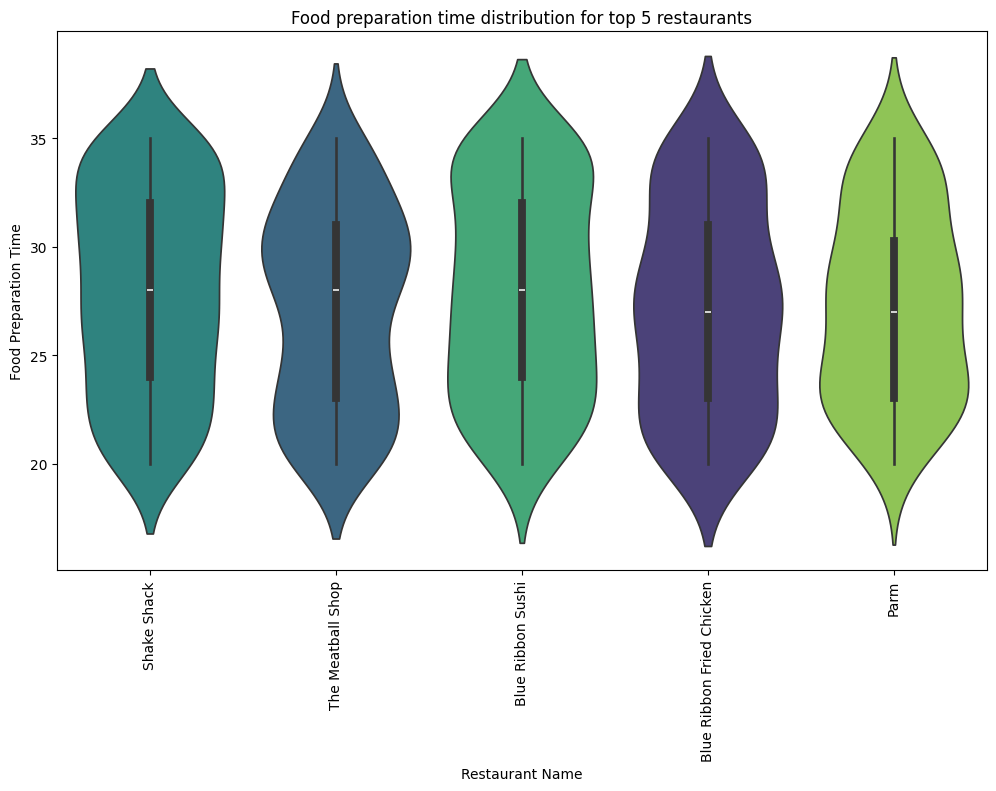

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=foodhub_top_5_restaurants, x='restaurant_name', y='food_preparation_time', order=restaurant_top_5, palette='viridis', hue='restaurant_name', legend=False);

plt.title('Food preparation time distribution for top 5 restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=90)
plt.show()

### Observations:
* Shape of the violin: Shapes of all violin plots looks somewhat similar. suggesting a unimodal distribution for each of these 5 restaurants.
* Median Preparation time: Seems to be similar for all restaurants, around 25-30 minutes. maybe blue ribbon fried chicken has slightly lower median compared to other 4 restaurants.
* Variability and Spread: We can see slight differnces in the spread na density of the distributions. Some plots appear slightly wider, while others appear sightly longer. (by IQR we can see this).
* The concentration of the data also looks similar across all 5 restaurants. We can say that they all take a similar amount of preparation time.

#### Distribution of **top 5 restaurant name - delivery time**

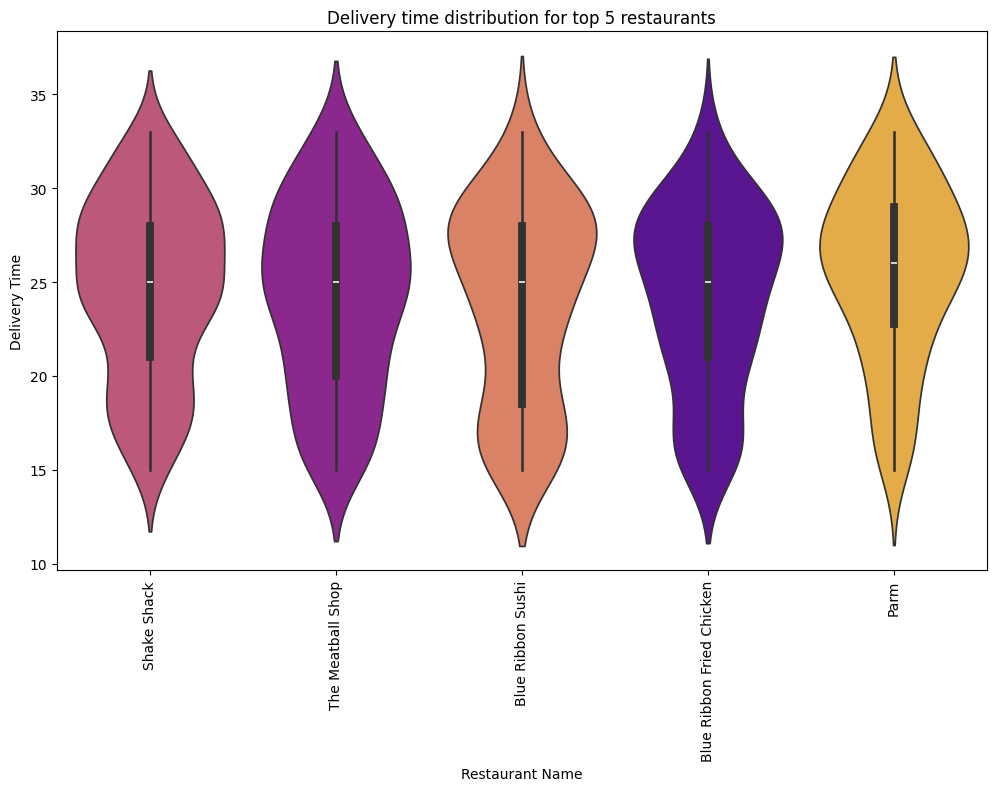

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=foodhub_top_5_restaurants, x='restaurant_name', y='delivery_time', order=restaurant_top_5, palette='plasma', hue='restaurant_name', legend=False)

plt.title('Delivery time distribution for top 5 restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Delivery Time')
plt.xticks(rotation=90)
plt.show()

### Observation
* Median delivery time for all restaurants look similar around 25 minutes except for parm which seems to be slightly above 25 minutes.
* Distribution Shape: Show similar to the preparation time, the delivery time also looks somewhat alike , suggests they are largely unimodal distrbution for delivery times, although we can see slight assymetry.
* Variability and speard: Parm appears wider spread of delivery times above the mdeian compared to below. Suggesting more variability in longer delivery times.
Other restauratns also have subtle differnces indicating that consistency of delivery times is not exactly the same across all 5 restaurants.
* The concentration of the data also looks similar across all 5 restaurants. We can see that above the medians for all plots is where the highest density is present and has majority of delivery times.

We can conclude that although medians are somewhat similar, there are slight variations in the spread and variability of delivery times for the top 5 restaurants.

#### Distribution of **Day of week - cost of the order**

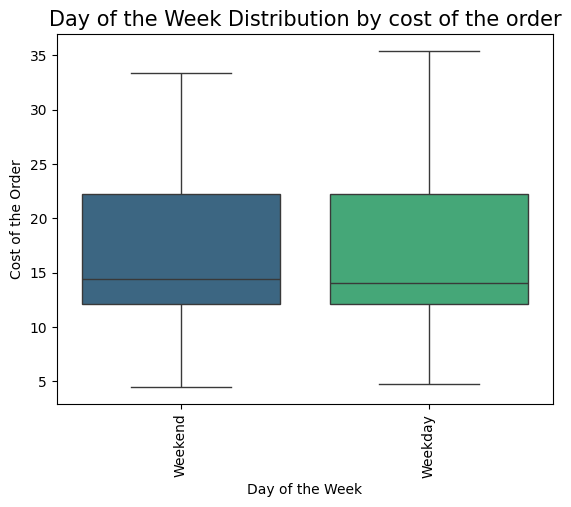

In [ ]:
sns.boxplot(data=foodhub, x='day_of_the_week', y='cost_of_the_order', palette='viridis', hue='day_of_the_week', legend=False);

plt.title('Day of the Week Distribution by cost of the order', fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=90)
plt.show()

### Obsrvations
* There are no major difference in the cost of the orders between weekends and weekday.
* But we can see a slight increase in maximum cost of the order on weekday, possibly due to higher vlaue cost of few orders.

Customers tend to spend similar amount on either day of the week

#### Distribution of **Day of week - food preparation time**

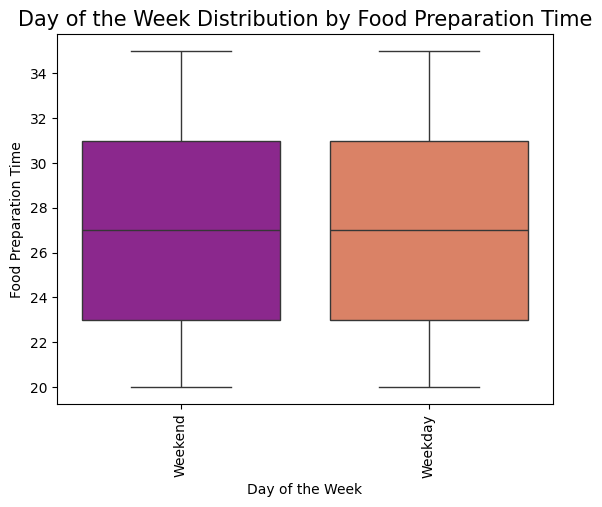

In [ ]:
sns.boxplot(data=foodhub, x='day_of_the_week', y='food_preparation_time', palette='plasma', hue='day_of_the_week', legend=False)

plt.title('Day of the Week Distribution by Food Preparation Time', fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=90)
plt.show()

### Observation


*   The two plots distribution looks identical. So it can be said that Food preparation time during weekend and weekday is same. it doesnt change based on the week of the day.



#### Distribution of **Day of week - Delivery time**

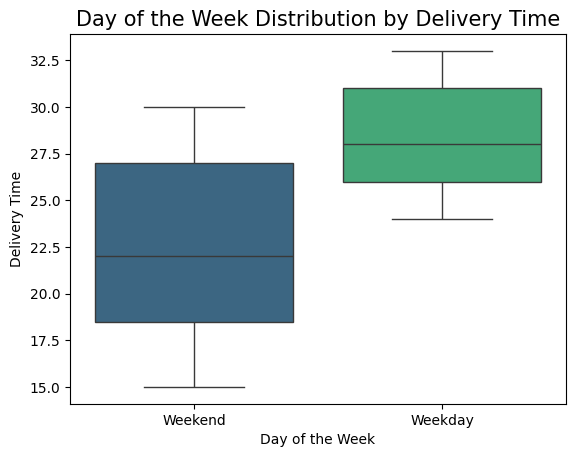

In [ ]:
sns.boxplot(data=foodhub, x='day_of_the_week', y='delivery_time', palette='viridis', hue='day_of_the_week', legend=False)

plt.title('Day of the Week Distribution by Delivery Time', fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

### Observation
We can see there is a significant differnce in the distribution of delivery time and day of week.
* Median delivery time: Slightly higher on weedays than weekends. Fater delivery on Weekends.
* Spread and variability: IQR is wider on weekends, indicating that greater variability in delivery times on weekend over weekday.
* Minimum delivery time on weekends is 15 minutes but on weekdays it is around 24 minutes.
* Maximum delivery time on weekends is 30 minutes but on weekdays it is 32.5 minutes
* Do not see any outliers, indicating that delivery time on the any day of the week is as expected not very early or late.

Can conclude that weekends has generally quickers deliveries, but also can vary. mostly because of the volume of orders we saw that weekends has more than twice the orders of weekday in our univariate analysis above.
Weekdays deliveries tend to be slower but consistent timings.

#### Distribution of **Rating - Delivery Time**

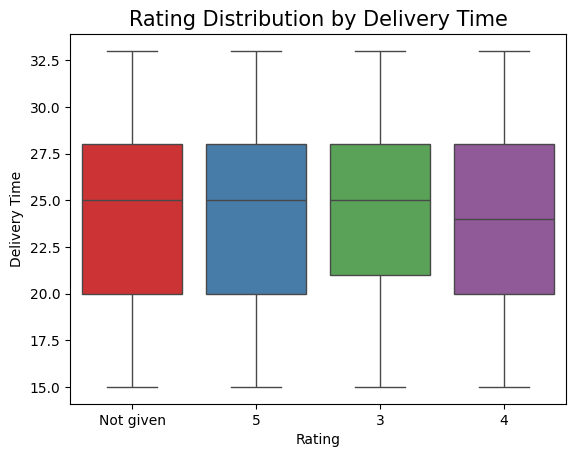

In [ ]:
sns.boxplot(data=foodhub, x='rating', y='delivery_time',palette='Set1', hue='rating', legend=False)

plt.title('Rating Distribution by Delivery Time', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

### Observation

*   Median Delivery time is slightly lower for rating 4.
*   Spread is almost same for all categories.
*   We can see the Q1 for rating 3 is higher. meaning lowest 25% of delivery times were higher, which means I can say people who rated 3 could have experiences slower deliveries.

Delivery time doesnt completely impact ratings, it could as we saw orders with rating 4 have slightly lower median, rating 3 have higher Q1.
So i can say delivery times might have a slight influence on ratings.




### Bivariate Analysis for **continuous - continuous** variables

#### Distribution of **food preparation - delivery time**

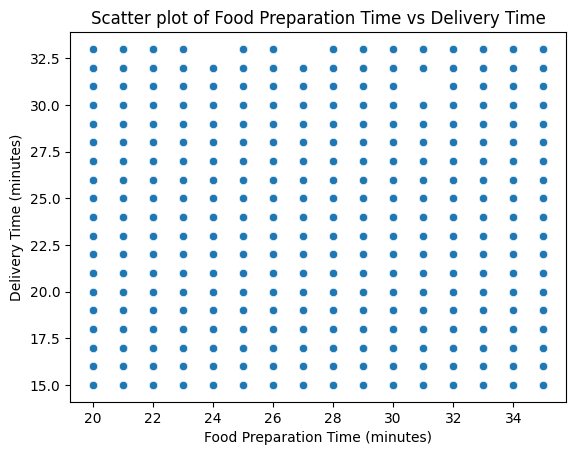

In [ ]:
sns.scatterplot(data=foodhub, x='food_preparation_time', y='delivery_time')

plt.title('Scatter plot of Food Preparation Time vs Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

### Observation

The points appear to be scattered randomly, there is no linear correlation. There is no pattern which can indicate whether the longer preparation time leads to longer or shorter delivery times.

So safe to safe Delivery time is independant of Food preparation time.

#### Distribution of **Cost of the Order - Delivery Time**

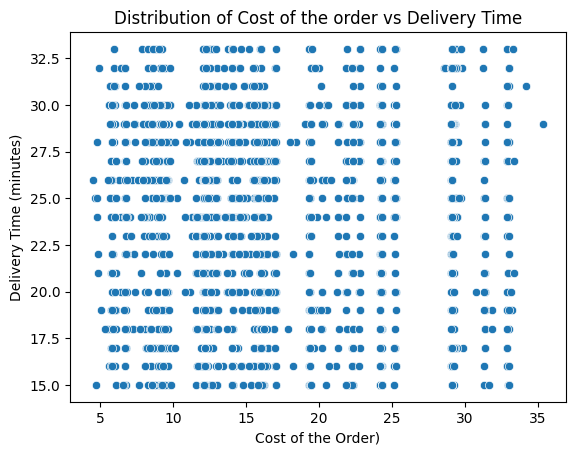

In [ ]:
sns.scatterplot(data=foodhub, x='cost_of_the_order', y='delivery_time')

plt.title('Distribution of Cost of the order vs Delivery Time')
plt.xlabel('Cost of the Order)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

### Observation

Here are as well, We do not see any correlation between the cost of the order and delivery time.
This was done to check whether the price of the order influenced the delivery time. In hope to know if the pricier the order was would that mean quicker delivery time. But we can see that is not the case, they are independant of each other.

#### Distribution of **Cost of the Delivery - Food Preparation**

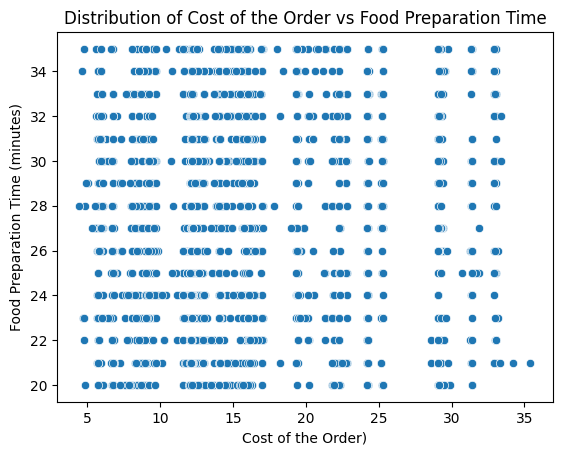

In [ ]:
sns.scatterplot(data=foodhub, x='cost_of_the_order', y='food_preparation_time')

plt.title('Distribution of Cost of the Order vs Food Preparation Time')
plt.xlabel('Cost of the Order)')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

### Observation

We do not see any correlation between the cost of the order and food preparation time.
This was done to check whether the price of the order influenced the food preparation time. In hope to know if the pricier the order was would that mean quicker food preparation time. But we can see that is not the case, they are independant of each other.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
orders_cost_more_than_20 = foodhub[foodhub['cost_of_the_order'] > 20].shape[0]
total_no_orders = foodhub.shape[0]
percentage_orders_cost_more_than_20 = (orders_cost_more_than_20/total_no_orders)*100
print(f"{percentage_orders_cost_more_than_20:.2f}% of the orders cost more than 20 dollars")

29.24% of the orders cost more than 20 dollars


#### Observations:
* 29.24% of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_delivery_time = foodhub['delivery_time'].mean()
print(mean_delivery_time)

24.161749209694417


#### Observations:


*   The mean order delivery time is 24.16 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
customer_order_count = foodhub['customer_id'].value_counts().head(3)
print(customer_order_count)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


*   The most frequently ordered cusomters are in the ascending order below
*   Customer_id - No of orders     
1.   52832 - 13
2.   47440 - 10
3.   83287 -  9





## **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Multi Variate **categorical - categorical - coninuous** variable analysis

#### **Top 5 restaurants - cuisine type - food preparation time** analysis

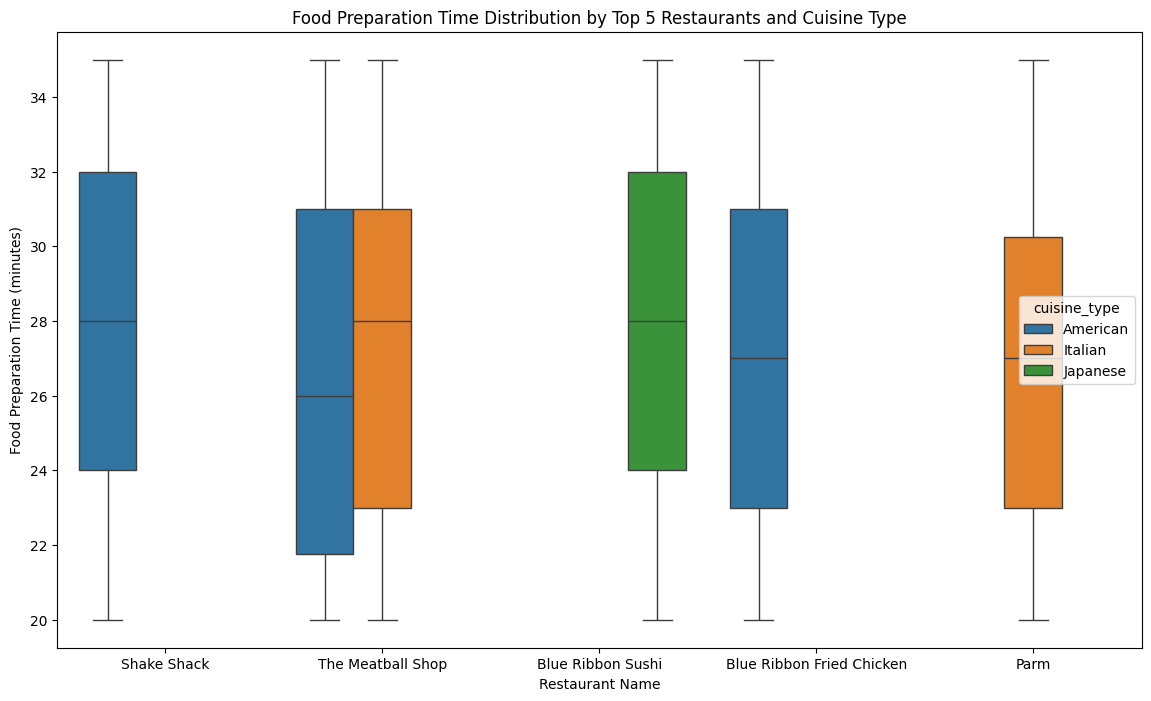

In [ ]:
top_5_cuisine_types_in_top_restaurants = foodhub_top_5_restaurants['cuisine_type'].unique().tolist()
foodhub_top_5_restaurants_filtered_cuisine = foodhub_top_5_restaurants[foodhub_top_5_restaurants['cuisine_type'].isin(top_5_cuisine_types_in_top_restaurants)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=foodhub_top_5_restaurants_filtered_cuisine, x='restaurant_name', y='food_preparation_time', hue='cuisine_type', dodge=True, order=restaurant_top_5)

plt.title('Food Preparation Time Distribution by Top 5 Restaurants and Cuisine Type')
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

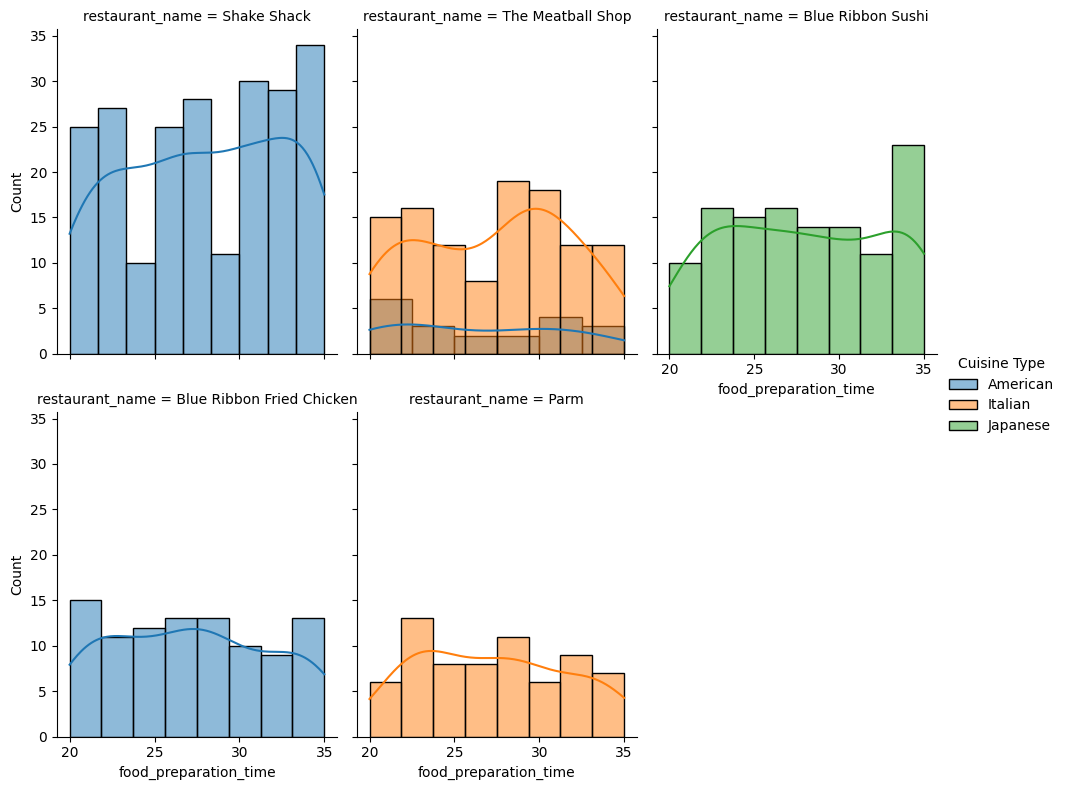

In [ ]:
restaurant_top_5_by_cuisine_type = sns.FacetGrid(foodhub_top_5_restaurants, col="restaurant_name", col_order=restaurant_top_5, hue="cuisine_type", col_wrap=3, height=4, aspect=0.8)
restaurant_top_5_by_cuisine_type.map(sns.histplot, "food_preparation_time", kde=True)
restaurant_top_5_by_cuisine_type.add_legend(title='Cuisine Type')
plt.show()

#### Observation

Looking at the Distribution we can analyse: American cuisine type seems to be served most in top 5 restaurants.

Cuisine Type Per Restauarant:
* All the top 5 restaurants except The Meat ball Shop primarily serve one cuisine type.
* Shake Shack, Blue Ribbon Fried chicken serve American Cuisine. Blue Ribbon Sushi serves Japanese Cuisine, Parm serves only Italian Cuisine.
* Only The Meat ball Shop serves American and Italian Cuisines.

Median Central tendency:
* the median food preparation count for American cuisine type is lower in the meatball shop ~26 minutes compared to Shake Shack ~28 minutes and Blue ribbon fried chicken ~27 minutes . Which means American Cuisine is fast cooked in The Meatball Shop.
* For italian type, the median is lower in Parm ~27 minutes when compared to the meatball shop ~28 minutes

IQR:
* The IQR is wider for american type cuisine in the meatball shop is wider even though median is lowest, Q1 is lowest, meaning food cooks typically faster than other restaurants but also has the most variation/iconsistency in cooking time.
* Other restaurants has more of a similar IQR, indicating consistent food preparation time.
* The italian cuisine seems almost similar in The Meat ball shop and Parm, but only in Meatball shop IQR is wider, means more variability in food preparation time. also has higher median compared to parm indicating longer cooking time.

Overall Range:
* The overall range of all restaurants all cuisines types is  from 20 - 35 minutes

Outliers:
* No outliers visibile in any of the cuisines in any of the restaurant types. indicating that food preparation time is not too less or high.

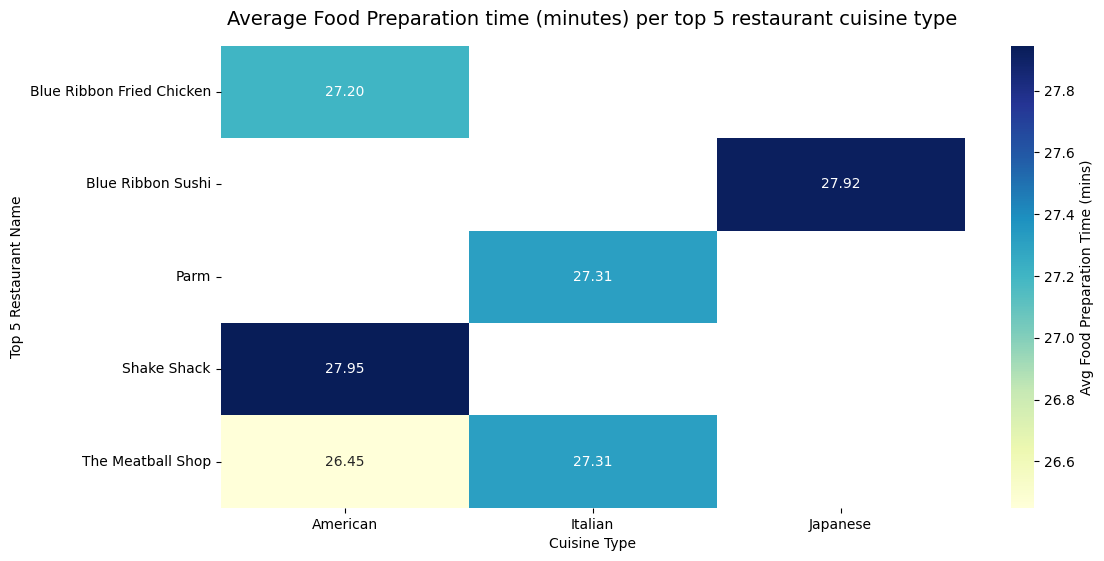

In [ ]:
restaurant_top_5_by_pivot = foodhub_top_5_restaurants.pivot_table(index='restaurant_name', columns='cuisine_type',values='food_preparation_time',aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(restaurant_top_5_by_pivot, annot=True,fmt='.2f',cmap='YlGnBu',cbar_kws={'label': 'Avg Food Preparation Time (mins)'})
plt.title("Average Food Preparation time (minutes) per top 5 restaurant cuisine type", fontsize=14,pad=15)
plt.xlabel("Cuisine Type")
plt.ylabel('Top 5 Restaurant Name')
plt.show()

#### Observation
*  Japanese cuisine from Blue Ribbon Sushi Takes longest time to prepare.
*  American Cuisine seems to take from around 26 - 28 minutes to prepare, longest time from Shake Shack, prepared faster in The Meat ball shop. Suggesting each restaurant has its own steps to prepare american cuisine and hence varies in the time taken to prepare.
* Italian Cuisine seems to take the same amount of time ~27 minutes in any of the restaurant. Indicating the preparation steps might all be standard and doesnt vary across restaurants.

#### **Top 5 restaurants - cuisine type - delivery time** analysis

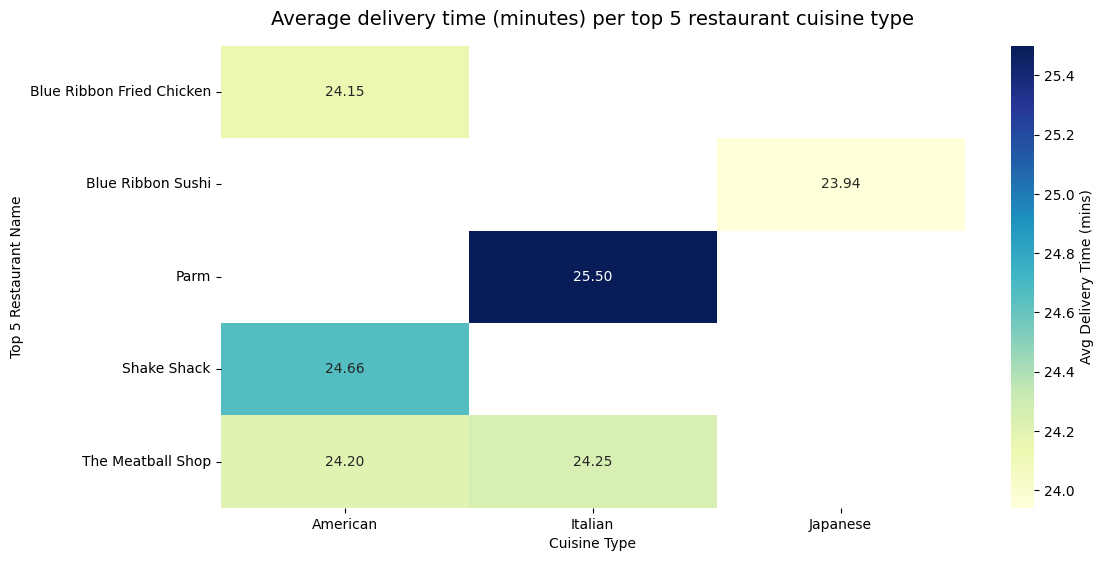

In [ ]:
restaurant_top_5_by_pivot = foodhub_top_5_restaurants.pivot_table(index='restaurant_name', columns='cuisine_type',values='delivery_time',aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(restaurant_top_5_by_pivot, annot=True,fmt='.2f',cmap='YlGnBu',cbar_kws={'label': 'Avg Delivery Time (mins)'})
plt.title("Average delivery time (minutes) per top 5 restaurant cuisine type", fontsize=14,pad=15)
plt.xlabel("Cuisine Type")
plt.ylabel('Top 5 Restaurant Name')
plt.show()

#### Observation
* Parm has the highest average delivery time ~25.5 minutes - could be due to delivery routes.
* Blue Ribbon Sushi delivers fastest ~23.94 minutes - Suggestis quick preparation or efficient delivery routes.
* Across Multiple restaurants, american cuisine has consisten delivery time - suggesting unifor operational patterns.
* The colour is very significantly dark in Parm restaurant, even though 1-2 minute difference it might be a critical when looked at granular level, but we can talk about efficieny here.
* Meatball shop has approxixmately same time for the deliveries of 2 different cuisines.
But we have seen earlier that **food delivery time is independant of food preparation time hence, delivery time taken here is completely based on the delivery route or the operation patterns followed by each restaurant**.

### **Top 5 restaurant name - cuisine type - cost of the order** analysis

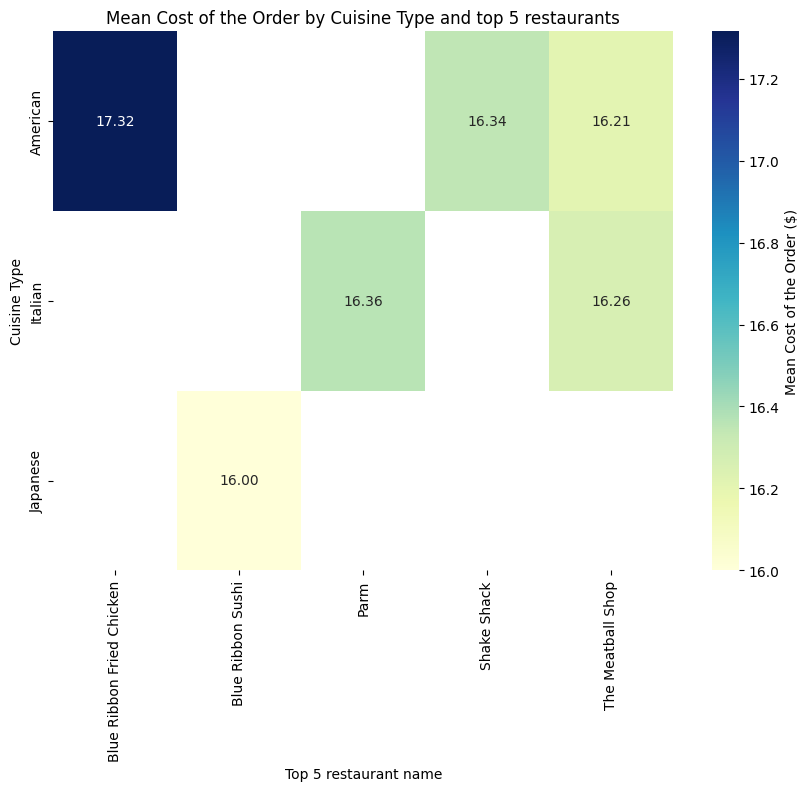

In [ ]:
cost_by_cuisine_by_restaurant = foodhub_top_5_restaurants.pivot_table(index='cuisine_type', columns='restaurant_name', values='cost_of_the_order', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(cost_by_cuisine_by_restaurant, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean Cost of the Order ($)'})
plt.title('Mean Cost of the Order by Cuisine Type and top 5 restaurants')
plt.xlabel('Top 5 restaurant name')
plt.ylabel('Cuisine Type')
plt.show()

#### Observation
* Highest Mean cost : is from Blue ribbon fried chicken annd american cuisine costing around 17.32 dollars.
* Italian Cuisine : is midrange average cost across both restaurants parm and meatball shop.
* Japanese Cuisine: Slightly lower than american or italian, despite seeen as a premium cuisine.

### **Top 5 restaurant - cost of the order - rating** analysis

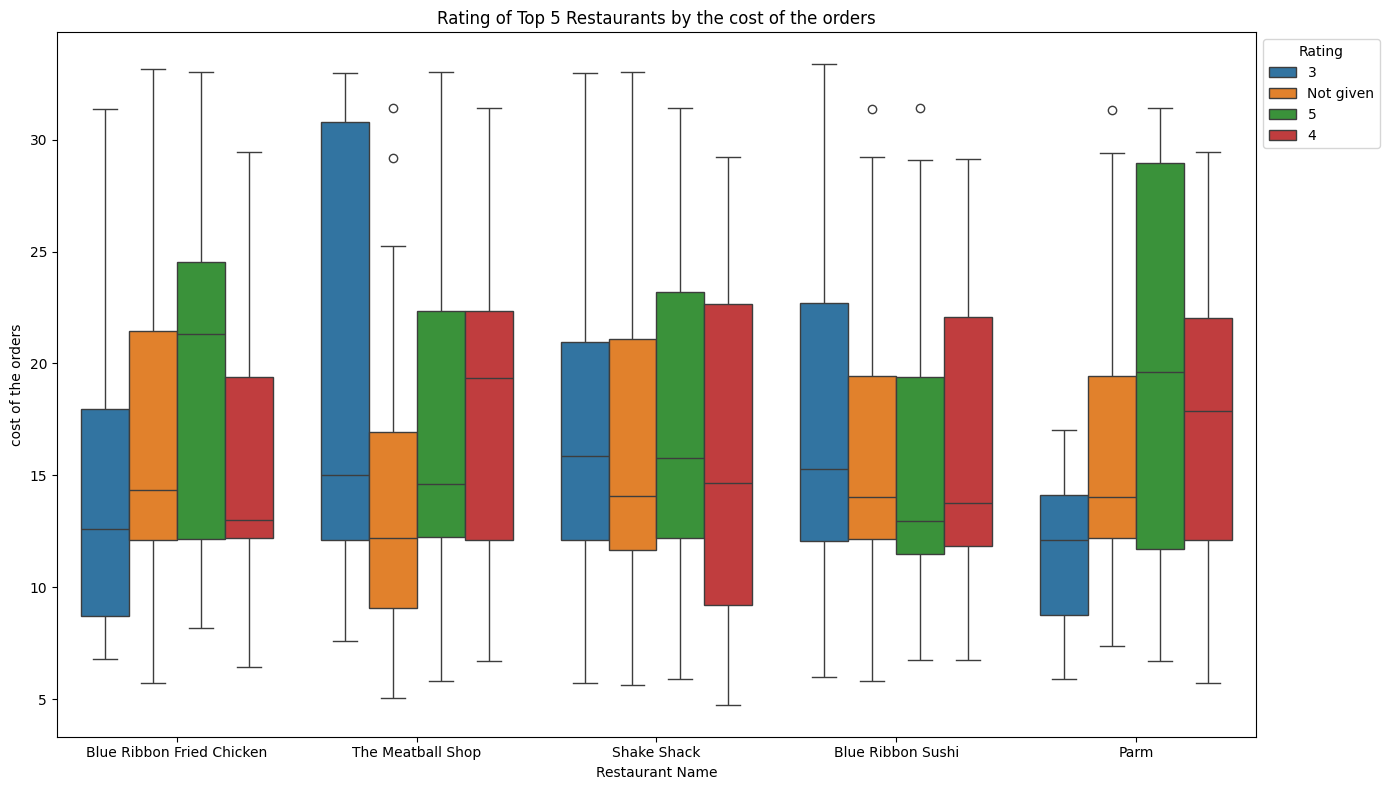

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=foodhub_top_5_restaurants,
    x='restaurant_name',
    y='cost_of_the_order',
    hue='rating'
)

plt.title('Rating of Top 5 Restaurants by the cost of the orders')
plt.xlabel('Restaurant Name')
plt.ylabel('cost of the orders')
plt.legend(title='Rating', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Observation
Restaurant Wise Analysis:
* Blue Ribbon Fried Chicken: Cost is spread around 10 -25  dollars.
The 5 star rating has a hugher median. 3 star rating seem have to have lower prices looking at IQR compared to 4,5 and not given rating.

* The Meatball shop: 4 star rating orders, seem to have unusal high prices as seen in outliers, and also seem to have lower prices range.
Looks like more variability in the prices for oders rated 3 star. Median cost for Not given rating is slightly lower.

* Shake Shack: 25% of the orders with 4 star rating seem to sart with lower prices compared to other ratings. And overall prices if u see the whiskers as well, they start and end much before compared to other ratings. indicaating lower prices for 4 star rated orders.

* Blue Ribbon Sushi: All the rated orders seems have a narrower cost distribution. Have two outliers for not give rating and 5 star ratings suggsting unusally higher price. The median for 5 star is lower than other ratings, saying customer satisfaction doesnt depend on cost. Indicating that unlike other restaurants, **the cost and rating is inverse. Lower cost tends to receive higher rating**.

* Parm: The median for 5 star ratings is really high and also the variance in the price for 5 star is really large, we can see that 3 star rating food are priced lower where 5 star rated food is pricier.
Wider cost range. Potential dissatisfaction with lower cost options.

Across all top 5 restaurants:
* Rating Cost relationship: In general 5 star rating shows higher median, 3, Not given rating median price seems to be almost similar, 4 star as well tends to have a higher median indicating that higher order price higher rating - possibly reflecting better quality and higher spends.

* All restauratns show similar overall price range 10 - 25 dollars median cost - showing unniform pricing strategy.

* Varitation by restaurant type: blue ribbon fried chicken and Parm tend to show higher median costs.

* Outliers : highers price orders from the meatball shop, blue ribbon sushi and parm show prices over 30 dollars. indicating premium orders or buulk orders.


Insights:

* Pricing vs. Customer Satisfaction: There may be a little correlation between more expenditure and higher ratings, indicating that consumers are more satisfied with more expensive meals.

* Emphasis on Value Optimisation: Restaurants such as Parm and Blue Ribbon Sushi might create high-value meal bundles by utilising their higher-rated premium items.

* Customer Engagement: There are a lot of "Not Given" ratings, which may point to the need for better post-order feedback systems.

* Menu Strategy: Minimising low ratings could be achieved by maintaining quality for lower-cost items, especially at Parm and Blue Ribbon Fried Chicken.

### **Cuisine Type - Day of the week - Cost of the order** analysis (Demand Pattern)

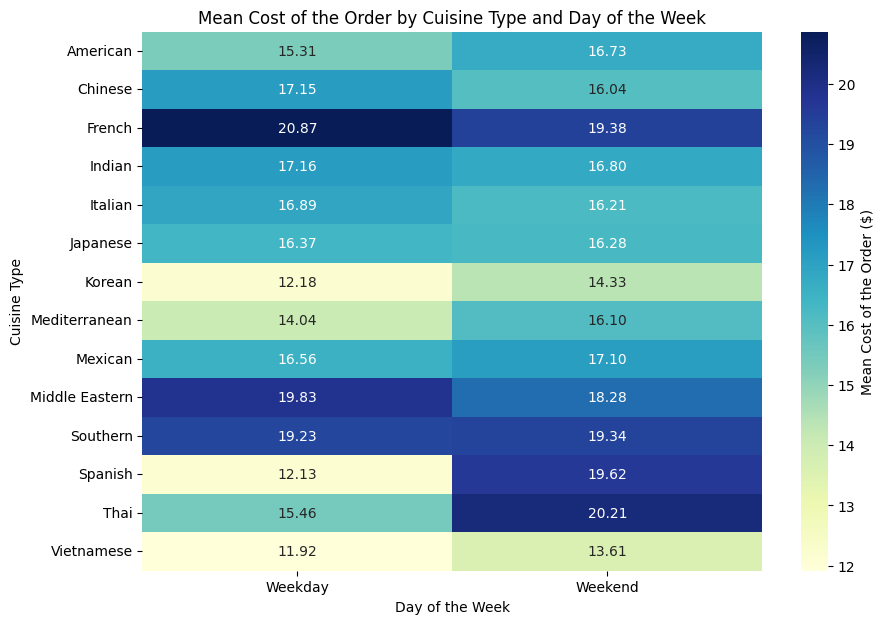

In [ ]:
cost_by_cuisine_day = foodhub.pivot_table(index='cuisine_type', columns='day_of_the_week', values='cost_of_the_order', aggfunc='mean')
plt.figure(figsize=(10, 7))
sns.heatmap(cost_by_cuisine_day, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean Cost of the Order ($)'})
plt.title('Mean Cost of the Order by Cuisine Type and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.show()

#### Observation
We can visualisze how average order costs vary across different cuisine types between weekday and weekends.
* Highest mean cost - French cuisine, sliight drop on weekends. Has potential for high end - fine dining demand. Followed by Middle eastern, southern cuisines on weekday. On weekend thai follwed by spanish and southern cuisine.
* Weekend spends: Spanish and thai cuisines show strong surges on weekend. indicating they are popular meals on weekend.
* Weekday preference: Looks like chinese and indian are weekday choices as on weekends they slightly drop.
* stable performers: Japanese, Itsalian, soutern maintain a consisent demand across both weekday and weekends.
* Budget friendly preferences: Vietnamese, Korean, Mediterranean cuisine, they have very slight increase on weekends but affordable.

### **Food preparation time - rating - day of the week** analysis

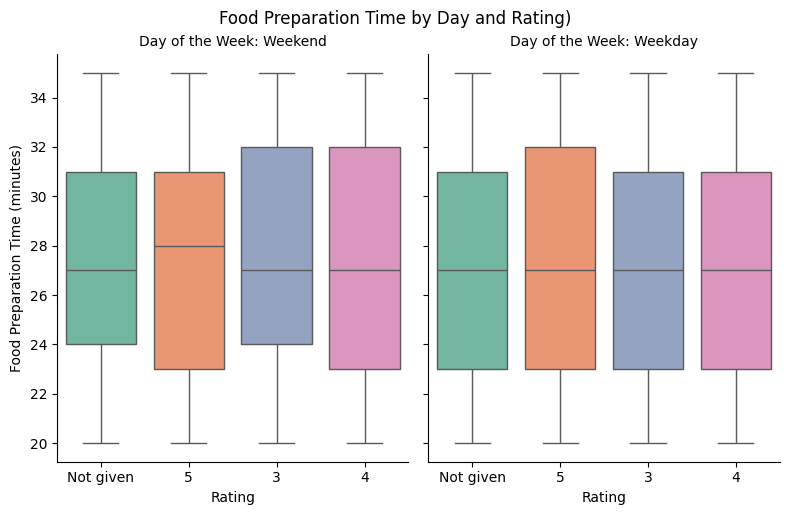

In [ ]:
foodhub_rating_preptime_by_day = sns.catplot(data=foodhub, x='rating', y='food_preparation_time', col='day_of_the_week', kind='box', palette='Set2', hue='rating', height=5, aspect=0.8)
foodhub_rating_preptime_by_day.fig.suptitle('Food Preparation Time by Day and Rating)', y=1.02);
foodhub_rating_preptime_by_day.set_axis_labels("Rating", "Food Preparation Time (minutes)")
foodhub_rating_preptime_by_day.set_titles("Day of the Week: {col_name}")
plt.show()

#### Observation

* weekend : Food preparation time is more for orders with 3,4 rating. Median time preparation is higher for rating 5 order.
* weekday: median preparation time is similar across all rating caategories.
* Variation: variation is slightly larger on weekend: suggests more inconsistency in prep time on weekends. could be due to higher volume.
* Outliers: Upper and lower whiskers appear to be on same times. so no extreme differences.
* No clear trend between rating and preparation time.
* Not given ratings - same distribution as rating orders. customers not giving ratings doesnt seem to be related to delays.

Customer satisfaction may depend on factors other than preparation time...
slightly higher variability may hint at operational bottlenecks under peak load.

### **Food preparation time - delivery time - cuisine type** analysis

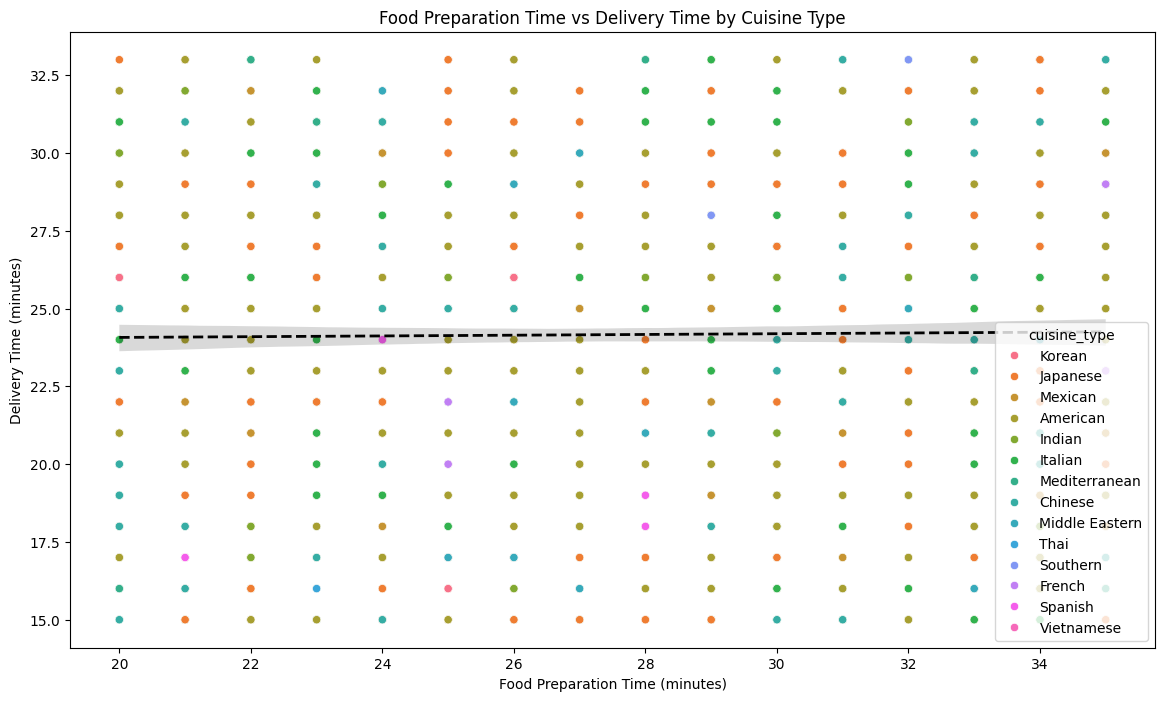

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=foodhub, x='food_preparation_time', y='delivery_time', hue = 'cuisine_type')
sns.regplot(
    data=foodhub,
    x='food_preparation_time',
    y='delivery_time',
    scatter=False,
    color='black',
    line_kws={'lw':2, 'ls':'--'}
)
plt.title("Food Preparation Time vs Delivery Time by Cuisine Type")
plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

In [ ]:
foodhub[['food_preparation_time', 'delivery_time']].corr()

,food_preparation_time,delivery_time
food_preparation_time,1.000000,0.011094
delivery_time,0.011094,1.000000


#### Observation
* No visible trends, the regression line is horizontal: means no significant correlation between fodod preparation time and delivery time.
* Similar delivery times across all cuisines. scattered unifrmly. Delivery time doesnt vary much by cuisine.
* correlation value is near 0, these numerical values have no correlation time.

### Analysis between **all numerical values**

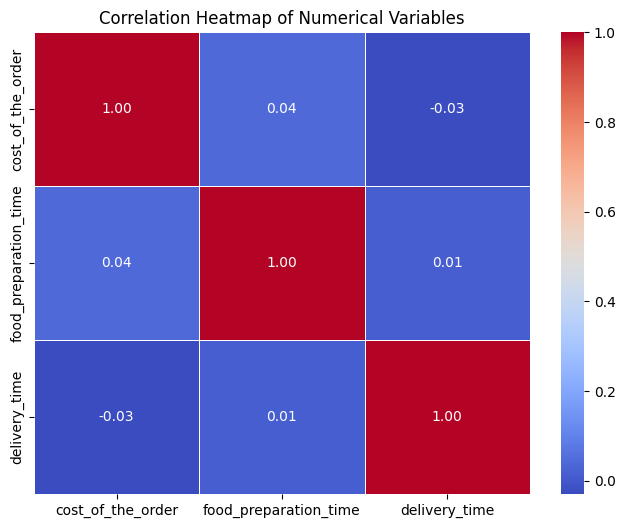

In [ ]:
numerical_foodhub = foodhub[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]

correlation_matrix = numerical_foodhub.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Observation
* cost_of_the_order and food_preparation_time: The correlation coefficient is very close to 0 (around 0.04). This indicates a very weak positive linear correlation, essentially meaning there's almost no linear relationship between the cost of the order and the food preparation time.

* cost_of_the_order and delivery_time: The correlation coefficient is also very close to 0 (around -0.03). This indicates a very weak negative linear correlation, meaning there's almost no linear relationship between the cost of the order and the delivery time.

* food_preparation_time and delivery_time: The correlation coefficient is very close to 0 (around 0.01). This indicates a very weak positive linear correlation, meaning there's almost no linear relationship between the food preparation time and the delivery time

The heatmap shows that there are very weak linear correlations between all pairs of these three numerical variables. This suggests that, based on this dataset, the cost of an order, the food preparation time, and the delivery time are largely independent of each other in a linear sense

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
foodhub_promotional = foodhub.copy()
foodhub_promotional['rating'] = pd.to_numeric(foodhub_promotional['rating'], errors = 'coerce')
foodhub_promotional.dropna(subset=['rating'], inplace=True)
# foodhub_promotional = foodhub_promotional.dropna(subset=['rating'])
foodhub_promotional_offer = foodhub_promotional.groupby('restaurant_name').agg(rating_count=('rating', 'count'), avg_rating=('rating', 'mean')).reset_index()
eligible_restaurant = foodhub_promotional_offer[(foodhub_promotional_offer['rating_count'] > 50) & (foodhub_promotional_offer['avg_rating'] > 4)]
eligible_restaurant

,restaurant_name,rating_count,avg_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


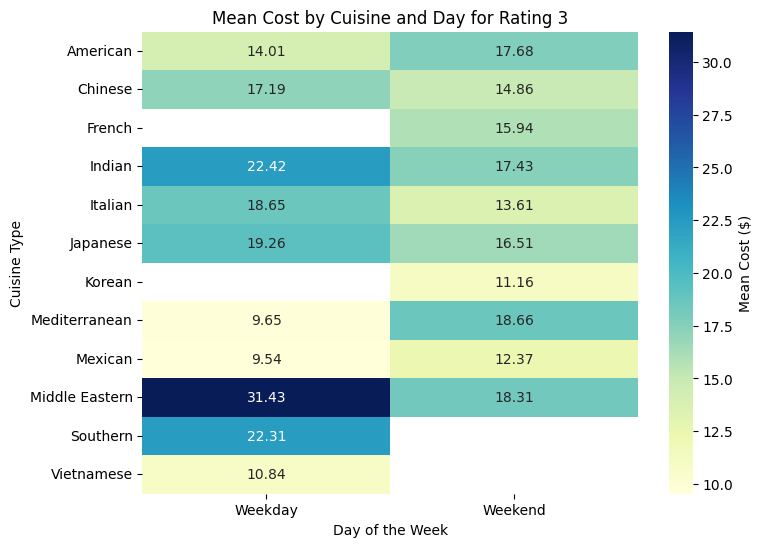

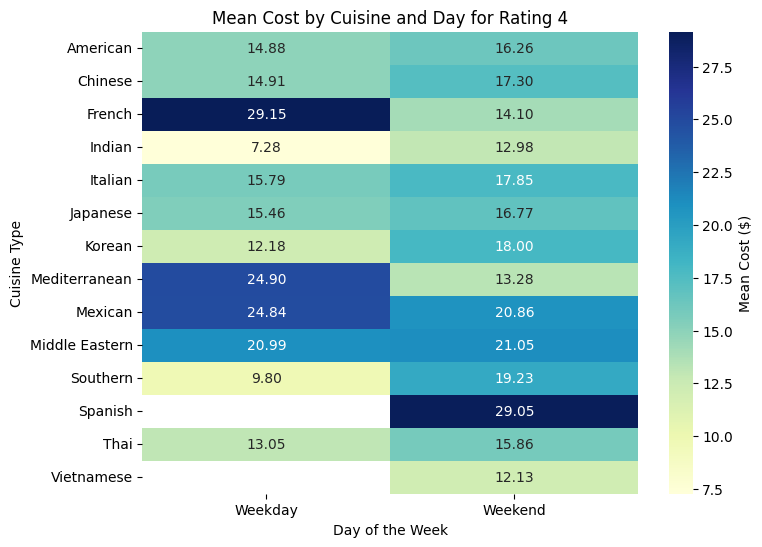

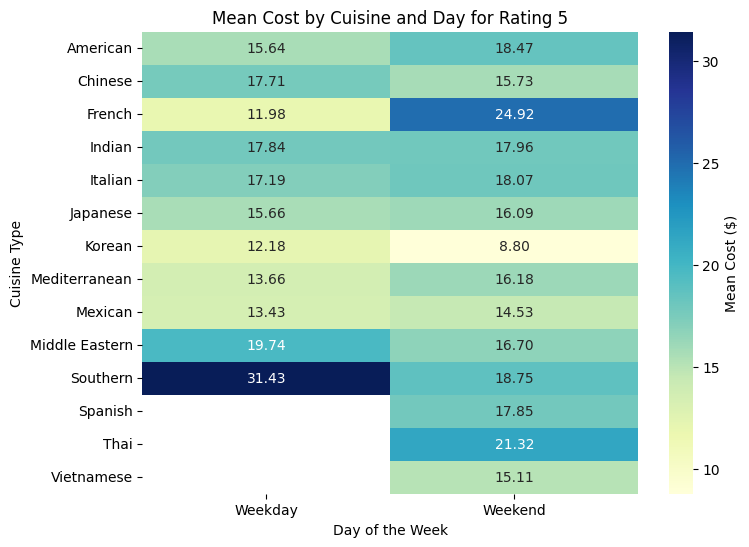

In [ ]:
foodhub_promotional.dropna(subset=['rating'], inplace=True)
mean_cost_by_cuisine_day_rating = foodhub_promotional.pivot_table(
    index='cuisine_type',
    columns='day_of_the_week',
    values='cost_of_the_order',
    aggfunc='mean'
)
for rating_val in sorted(foodhub_promotional['rating'].unique()):
    subset_df = foodhub_promotional[foodhub_promotional['rating'] == rating_val]
    if not subset_df.empty:
        mean_cost_by_cuisine_day_rating_subset = subset_df.pivot_table(
            index='cuisine_type',
            columns='day_of_the_week',
            values='cost_of_the_order',
            aggfunc='mean'
        )
        plt.figure(figsize=(8, 6))
        sns.heatmap(mean_cost_by_cuisine_day_rating_subset, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean Cost ($)'})
        plt.title(f'Mean Cost by Cuisine and Day for Rating {int(rating_val)}')
        plt.xlabel('Day of the Week')
        plt.ylabel('Cuisine Type')
        plt.show()

#### Observations:
Based on the company promotional offer criteria following restaurants qualify : Blue Ribbon Fried Chickem, Blue Ribbon Sushi, Shake Shack, The meatball Shop. These restaurants have strong reputation supported by both popularity and customer satisfaction.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
foodhub_revenue = foodhub.copy()
foodhub_revenue['handling_rate'] = np.where(foodhub_revenue['cost_of_the_order']> 20,0.25, np.where(foodhub_revenue['cost_of_the_order']>5,0.15,0))
foodhub_revenue['handling_charges'] = foodhub_revenue['handling_rate']*foodhub_revenue['cost_of_the_order']
foodhub_net_revenue = foodhub_revenue['handling_charges'].sum()
print(foodhub_net_revenue)

6166.303


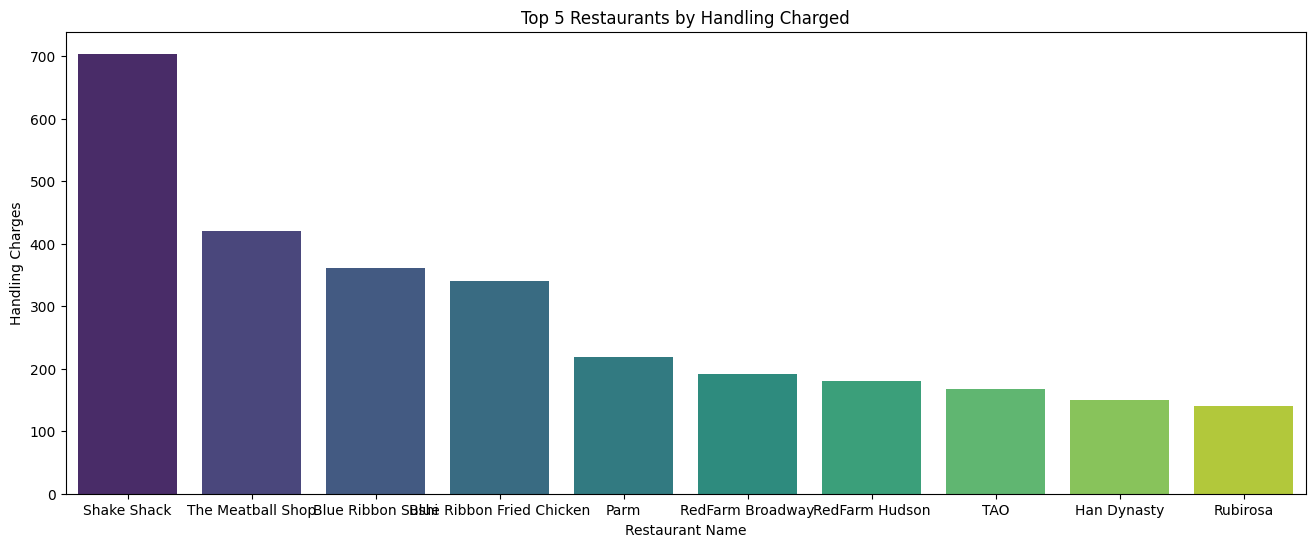

In [ ]:
revenue_per_restaurant = foodhub_revenue.groupby('restaurant_name')['handling_charges'].sum().reset_index()
revenue_per_restaurant = revenue_per_restaurant.sort_values(by='handling_charges', ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=revenue_per_restaurant.head(10), x='restaurant_name', y='handling_charges', palette='viridis', hue='restaurant_name', legend=False);
plt.title('Top 5 Restaurants by Handling Charged')
plt.xlabel('Restaurant Name')
plt.ylabel('Handling Charges')
plt.show()

#### Observations:
The company earns 25% commission on high value orders (>20 dollars) and 15% on mid value orders (>5 dollars).
**The total revenue generated across all orders on foodhun dataset is 6166.303 dollars**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
foodhub_delivery_time = foodhub.copy()
foodhub_delivery_time['total_time'] = foodhub_delivery_time['food_preparation_time'] + foodhub_delivery_time['delivery_time']
total_order = len(foodhub_delivery_time)
orders_more_than_60 = len(foodhub_delivery_time[foodhub_delivery_time['total_time'] > 60])
percentage_orders_more_than_60 = (orders_more_than_60/total_order)*100
print(f"{percentage_orders_more_than_60:.2f}% orders take > 60 minutes", )

10.54% orders take > 60 minutes


#### Observations:

*   Around **10.5%** of the orders take more than 60 minutes from food preparation till delivery of the food.



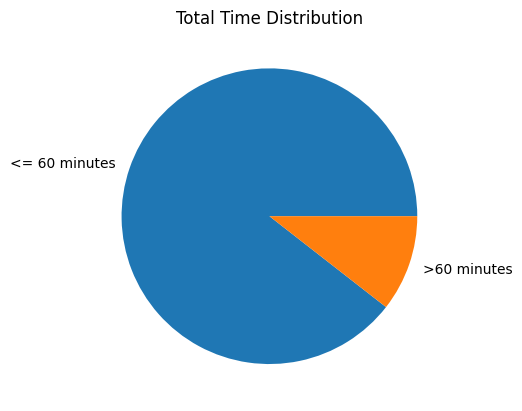

In [ ]:
labels = ['<= 60 minutes', '>60 minutes']
counts = [(foodhub_delivery_time['total_time'] <= 60).sum(), (foodhub_delivery_time['total_time'] > 60).sum()]

plt.pie(counts, labels=labels)
plt.title('Total Time Distribution')
plt.show()

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
mean_delivery_time = foodhub.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
print(mean_delivery_time)

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:

* Mean delivery time is more on weekday, it means that weekday orders take longer on average than weekends.
* possible reasons could be traffic congestion or short of delivery agents or high customer demand.
* The compamy could allocate more delivery partners on weekdays to maintain consistency or optimize the routes taken on weekday.   



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The number of orders are more on weekends.
* Delivery performance: It was observed that even though most of the delivery time is consistent (20-35 minutes) we saw also saw 10.54% ofthefood orders takes over 60 minutes. This indicated certain bottle necks which needs to minimized.
* Preparation is not directly related to delivery time across foodhub dataset: The correlation between fod preparation time and delivery time is ~0. The horizontal line in scatter plot indicates that delivery logistics impact the delivery time.
* Certain restaurants, cuisines stand out for cost and delivery time: Yop 5 restaurants genarate majority of hanling charges (ex: shake shack, meatball shop). Similarly Cuisine french, italian etc show unique patterns in cost, delivery.
* Weekends have longer mean delivery time: Mean delivery time is higher on weekends than weekdays. The company experiences higher load on weekday than weekends.
* High rating restaurants can be targeted for promotions: Restaurants meeting the promotional offer criteria represent strong charectristics for advertised offers as they have customer satosfaction and poopularity.
* Handling charges concentrated among fewer restaurants: A few popular, top 5 of restaurants contribute to a large share of the companies revenue. This
follows like the 80-20. i.e around 20% of restaurants bring in about 80% of companies revenue.


### Recommendations:
Operational and service improvements
*  Address the > 60 minutes time issue : do an operational review for all the orders exceeding 60 minutes, inspect the root cause for the delays. whether they are time consuming for rider's assignment or rider delivering, or restaurant taking long to prepare.

* Weekday capacity: Increase delivery agents avaialability on weekdays, try to provide incentives for working on weekdays to reduce the mean delivery time.

*Separate Drivers vs kitchen bottlenecks: Preparation time anddelivery are weakly corelated meaning in order to identify the rootcauuse - need to have more info regarding the start of the food item, when it is completed cooking and when it is ready for pick up, when the delivery agent actually pick up the order.

Business & Marketing

* Promote the high count , high average rating restaurants : restaurants that meet the criteria of customer satisfactiong and popularity. to improve more customers.

* Target high commission generating restaurants for partnership : Recenue is concentrated in few premium restaurants or likely where there is more margin for profit. need to partner with suchrestaurants.

* Offer target promotions: Provide discounts on current oder or on next order  or give a priority delivery for orders which have a very high total time.

Product & Analysis :

* Add data-quality and monitoring improvements: Rating should be taken madatorily, ensure that once they place the order they have to provide rating for the order post delivery to ensure we have cleaner data and no missing values. it gives opportunity for honest feedback of restauratns and cuisines.

*

